## Info: ##
Info on codes used in Dutch Diphones dataset: https://www.mpi.nl/world/dcsp/diphones/material/download/README.txt

Info on CELEX transcription for Dutch (without reference to IPA or other transcription systems):
https://www.fon.hum.uva.nl/rob/Intas/rvs/RobVanSonProc24-IFAcorpus.html

Info on CELEX transcription for English (as a brief overview and comparison with IPA): https://groups.linguistics.northwestern.edu/speech_comm_group/documents/CELEX/Phonetic%20codes%20for%20CELEX.pdf

## Instructions ##

Set the variables directory_path , and image_files to to either a directory of spectrogram/waveform images of consonants, vowels, or diphthongs (e.g., works by default best with the Dutch diphone dataset found through link provided above). Then, define the variable unique_sounds with the possible answers you will be able to respond with (depends on what kinds of sounds you have as images in image_files).

For testing, you can define showAnswer, showFiles2SoundVals, showProbabilityChange, showStagingArea as True. They should be set to False by default.

Then, run! And guess the first sound you see in the spectrogram, depending on whether you're looking for diphones, consonants, or vowels.

In [11]:
!cd ./pairs-dutch-vowels-imgs/dutch-vowels-imgs/

/bin/bash: line 0: cd: ./pairs-dutch-vowels-imgs/dutch-vowels-imgs/: No such file or directory


In [7]:
# Run this cell to remove records of a pre-run flashard game.
!rm ./index.txt
!rm ./probabilities.txt
!rm ./learned_items.txt

rm: cannot remove './learned_items.txt': No such file or directory


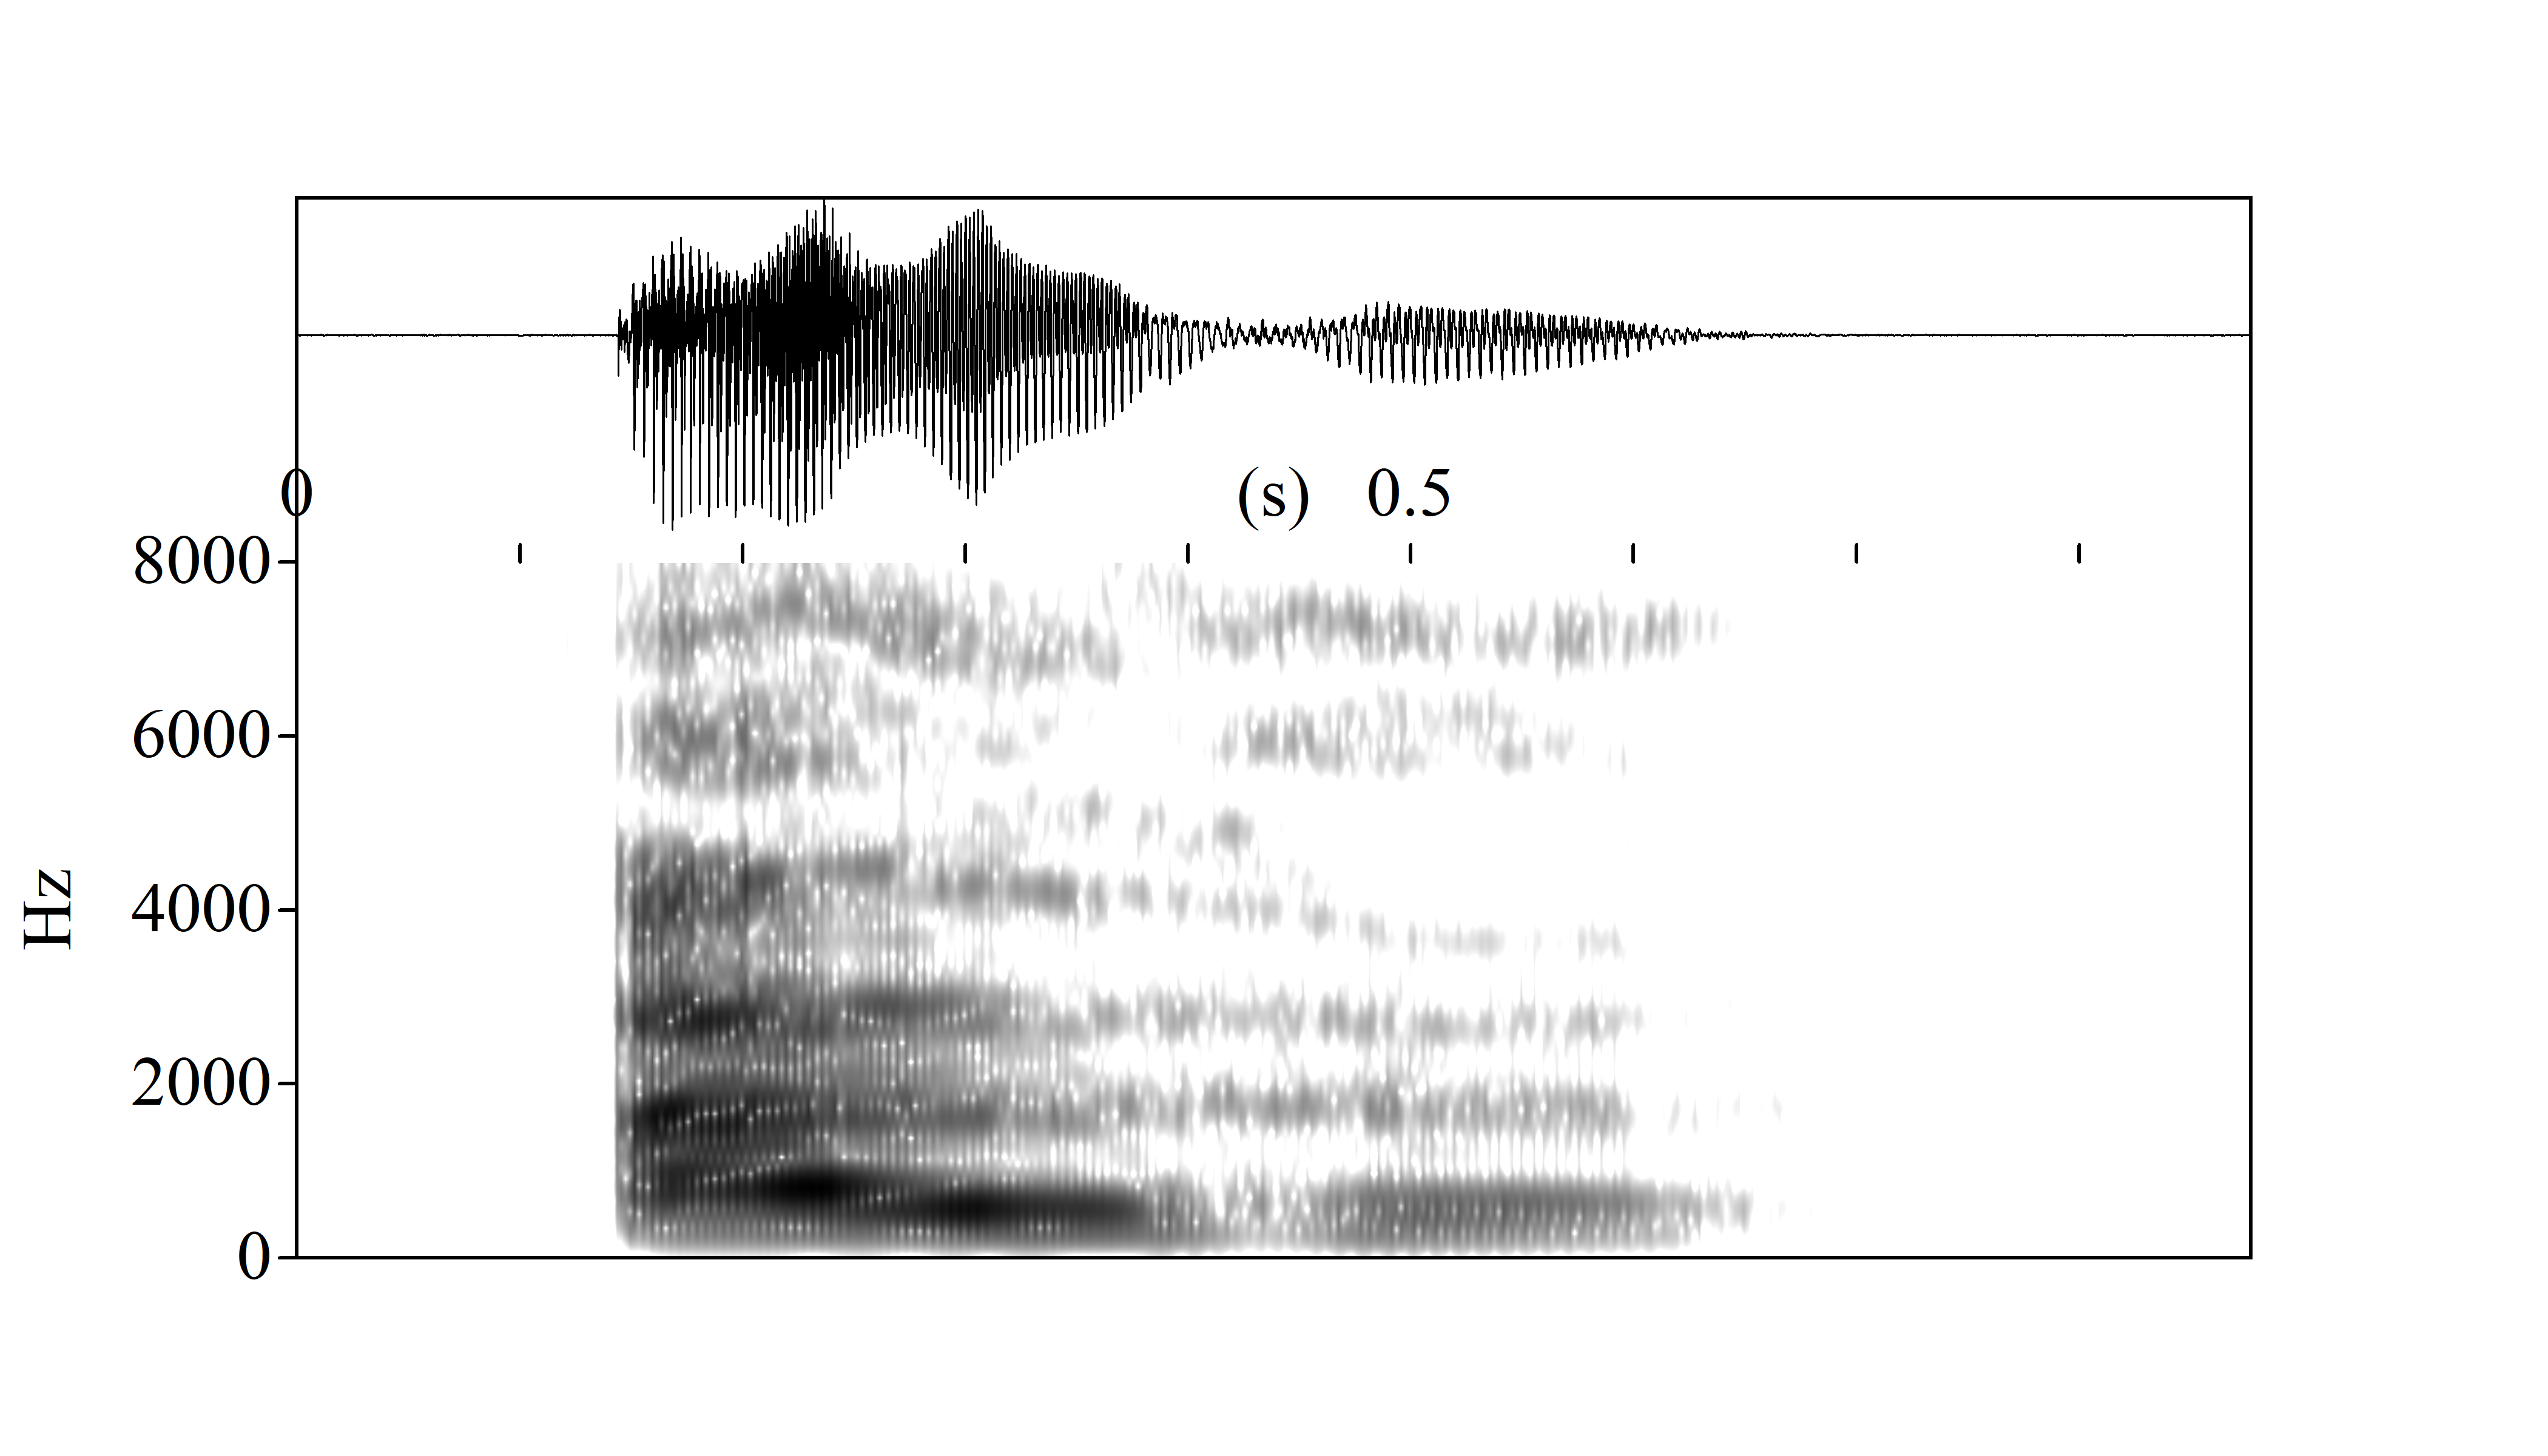

The sounds can be 'a', 'ah', 'e', 'eh', 'i', 'ih', 'o', 'oh', 'u', 'uh', 'ui', 'y'.


Guess the first sound in the audio represented by this spectrogram:  a


---------------------------------------
		Sorry, the correct sound was ui!
---------------------------------------
(The sound file for this spectrogram was ui_h3.wav)
---------------------------------------


In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import random
import re
from IPython.display import Image, display
import numbers

# Arguments
# Replace this with the actual path to your directory where your outputs will be found (this can be the same as the directory of your image files)
directory_path = "./"
# path/to/diphthong_or_consonant_or_vowel_dir
image_files = './pairs-dutch-vowels-imgs/dutch-vowels-imgs/'
# number of items to add to list to review
batchNum = 7
# 3 for easy or 5 for difficult are recommended.
# (Changes the number of times that an item is asked: for a value of 3, you must answer right thrice; for 5, four times.)
difficulty_num = 3

# For troubleshooting: all of these are False by default.
# True or False
showAnswer = False
showFiles2SoundVals = False
showProbabilityChange = False
showStagingArea = False

# What set of sounds are you being quizzed on? Consonants, vowels, or diphthongs?
consonants = ['n', 'r', 'd', 'f', 'z', 's', 'dj', 'sh', 'b', 'k', 'vh', 'x', 'h', 'w', 'g', 'm', 'p', 'gx', 'v', 'ng', 'l', 'zh', 't', 'j']
vowels = ['a', 'ah', 'e', 'eh', 'i', 'ih', 'o', 'oh', 'u', 'uh', 'ui', 'y']
unique_sounds = vowels

# Functions up to making/extracting the index.txt file
def list_png_files(directory):
    png_files = []
    for filename in os.listdir(directory):
        if filename.lower().endswith('.png'):
            png_files.append(filename)
    return png_files

def find_unique_sounds(input_list):
    unique_items = list(set(input_list))
    return unique_items

def check_file_exists(directory, filename):
    filepath = os.path.join(directory, filename)
    return os.path.exists(filepath)

def write_tuples_to_text(filename, tuple_list):
    with open(filename, 'w') as file:
        for item in tuple_list:
            line = ' '.join(str(element) for element in item)
            file.write(line + '\n')
            
def update_document(filename, target_word): # not used by default
    with open(filename, 'r+') as file:
        lines = file.readlines()
        file.seek(0)
        file.truncate()
        
        for line in lines:
            words = line.strip().split()
            if len(words) >= 2 and words[1] == target_word:
                continue  # Skip lines with the specified second word
            file.write(line)

def get_first_words(filename):
    first_words = []
    with open(filename, 'r') as file:
        for line in file:
            words = line.strip().split()
            if len(words) >= 1:
                first_words.append(words[0])
    return first_words

def get_second_words(filename):
    second_words = []
    with open(filename, 'r') as file:
        for line in file:
            words = line.strip().split()
            if len(words) >= 2:
                second_words.append(words[1])
    return second_words

def create_dictionary(list1, list2):
    if len(list1) != len(list2):
        raise ValueError("Both lists must have the same length.")

    my_dict = {}
    for key, value in zip(list1, list2):
        my_dict[key] = value
    return my_dict


# Checking for index.txt document and make if not present
# Each line is in format <sound> <original_filename>
# (If you don't want particular files to be selected, remove them from this file with update_document. This is part of the reason to have an index.txt file.)
original_images = list_png_files(image_files)
if check_file_exists(directory_path, 'index.txt') == False:
    lines = []
    for image in original_images:
        two_sounds = image.split("_")
        line = (two_sounds[0], image)
        lines.append(line)
    write_tuples_to_text('index.txt', lines)
# Whether or not the index is from the original set of files or not, we get the current selection from the file
current_images = get_second_words(directory_path+'index.txt')
current_sounds = get_first_words(directory_path+'index.txt')
files2sounds = create_dictionary(current_images, current_sounds)
#print(current_images)

# Functions for probabilities.txt up to randomly selected quizzing_item
def get_random_items(input_list, num_items):
    if num_items >= len(input_list):
        return input_list
    else:
        return random.sample(input_list, num_items)
    
def create_normalized_probabilities(length, difficulty_num=3):
    return [difficulty_num] * length 
    
def write_combined_lines(filename, list1, list2, list3):
    with open(filename, 'w') as file:
        for item1, item2, item3 in zip(list1, list2, list3):
            line = f"{item1} {item2} {item3}\n"
            file.write(line)
            
def append_combined_lines(filename, list1, list2, list3): # replacement of write_combined_lines
    with open(filename, 'a') as file:  # Use 'a' mode to append to the file
        for item1, item2, item3 in zip(list1, list2, list3):
            line = f"{item1} {item2} {item3}\n"
            file.write(line)

def read_lines_without_zeros(filename):
    selected_lines = []
    with open(filename, 'r') as file:
        for line in file:
            if not line.strip().endswith('0'):
                if not line.strip().endswith('E'): # 'E' stands for 'error'. Errors sometimes occur for particular items. Could also mean "learnt."
                    selected_lines.append(line.strip())
    return selected_lines

def create_word_lists(selected_lines):
    list1 = []
    list2 = []
    list3 = []
    for line in selected_lines:
        words = line.split()
        if len(words) >= 3:
            list1.append(words[0])
            list2.append(words[1])
            list3.append(words[2])
    return list1, list2, list3

def convert_to_float_list(string_list):
    float_list = []
    for item in string_list:
        try:
            float_value = float(item)
            float_list.append(float_value)
        except ValueError:
            pass  # Skip items that cannot be converted to floats
    return float_list

def convert_to_numeric_list(float_list):
    numeric_list = []
    for item in float_list:
        if isinstance(item, numbers.Number):
            numeric_list.append(item)
        else:
            try:
                numeric_value = float(item)
                numeric_list.append(numeric_value)
            except ValueError:
                pass  # Skip items that cannot be converted to numerical values
    return numeric_list

def check_lines(filename): # returns true if there are no 0's and E's. false if not.
    with open(filename, 'r') as file:
        for line in file:
            words = line.strip().split()
            if len(words) >= 3:
                third_word = words[2]
                if not third_word.endswith(('0', 'E')):
                    return False
    return True

# Checking for probabilities.txt document and make if not present
# In format <sound> <original-title> <probability>
if check_file_exists(directory_path, 'probabilities.txt') == False:
    staged_files = get_random_items(current_images, batchNum)
    staged_sounds = []
    for file in staged_files:
        staged_sounds.append(files2sounds[file])
    staged_normalized_probabilities = create_normalized_probabilities(len(staged_files), difficulty_num) # creates list with the same probability for each item (line)
    # Writes to probabilities.txt file with this information as well as a list of normalized probabilities
    # (three lists to a text document)
    write_combined_lines(directory_path+'probabilities.txt', staged_sounds, staged_files, staged_normalized_probabilities)
else: # If probabilities.txt is found, finds the non-zero items and makes these the staged_files and staged_sounds instead with their probabilities
    if check_lines(directory_path+'probabilities.txt'):
        staged_files = get_random_items(current_images, batchNum)
        staged_sounds = []
        for file in staged_files:
            staged_sounds.append(files2sounds[file])
        staged_normalized_probabilities = create_normalized_probabilities(len(staged_files)) # creates list with the same probability for each item (line)
        # Writes to probabilities.txt file with this information as well as a list of normalized probabilities
        # (three lists to a text document)
        append_combined_lines(directory_path+'probabilities.txt', staged_sounds, staged_files, staged_normalized_probabilities)
    else:
        process_and_update_file(directory_path+'probabilities.txt')
        selected_lines = read_lines_without_zeros(directory_path+'probabilities.txt')
        staged_sounds, staged_files, staged_normalized_probabilities = create_word_lists(selected_lines)

        if showFiles2SoundVals == True:
            print("Sounds in staging area...")
            print(staged_sounds)
            print("Files in staging area...")
            print(staged_files)

        float_probabilities = convert_to_float_list(staged_normalized_probabilities)
        staged_normalized_probabilities = convert_to_numeric_list(float_probabilities)

# Selects one quizzing item from probabilities.txt based on probabilities of each item
# (changes them from normalized form in order to do this)
def select_filename_with_probability(filenames, probabilities):
    if len(filenames) != len(probabilities):
        raise ValueError("The number of filenames and probabilities must be the same.")

    # Normalize probabilities to ensure they add up to 1.0
    total_probability = sum(probabilities)
    normalized_probabilities = [p / total_probability for p in probabilities]

    # Randomly select a filename based on the normalized probabilities
    chosen_filename = random.choices(filenames, normalized_probabilities)[0]

    # Get the item number (index) of the selected filename in the original list
    item_number = filenames.index(chosen_filename)

    return chosen_filename, item_number

filename_itemNum = select_filename_with_probability(staged_files, staged_normalized_probabilities)
quizzing_file = filename_itemNum[0]
item_number = filename_itemNum[1]

# Quizzes user and change probabilities in text file and also to remove files from index.txt if they have reached 0 probability
# Functions to do this
def remove_lines_with_second_word(filename, target_word):
    with open(filename, 'r') as input_file:
        lines = input_file.readlines()

    with open(filename, 'w') as output_file:
        for line in lines:
            words = line.strip().split()
            if len(words) >= 2 and words[1] == target_word:
                continue  # Skip lines with the specified second word
            output_file.write(line)
            
def update_probability(filename, quizzing_file, new_number):
    with open(filename, 'r') as input_file:
        lines = input_file.readlines()

    with open(filename, 'w') as output_file:
        for line in lines:
            words = line.strip().split()
            if len(words) >= 3 and words[1] == quizzing_file:
                words[2] = str(new_number)  # Update the third word with new_number
                updated_line = ' '.join(words) + '\n'
                output_file.write(updated_line)
            else:
                output_file.write(line)
                
# to make sure no non-numeric floats remain
def process_and_update_file(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()

    with open(filename, 'w') as file:
        for line in lines:
            words = line.strip().split()
            if len(words) >= 3:
                try:
                    words[2] = str(int(float(words[2])))  # Convert third word to a float, then to an integer, and then back to a string
                except ValueError:
                    pass  # Skip conversion if the third word is not a float
            updated_line = ' '.join(words) + '\n'
            file.write(updated_line)
            
def add_line_to_file(filename, line):
    with open(filename, 'a') as file:
        file.write(line + '\n')
        
def create_text_document(filename, content):
    with open(filename, 'w') as file:
        file.write(content)
        
# Does it
image_path = image_files+quizzing_file
if quizzing_file in current_images:
    correct_answer = files2sounds[quizzing_file]
    
    if showAnswer == True:
        print(correct_answer)
    # Display the image
    display(Image(filename=image_path))
    print(f"The sounds can be {str(unique_sounds)[1:-1]}.")
    user_input = input("Guess the first sound in the audio represented by this spectrogram: ")
    print("---------------------------------------")
    if user_input == correct_answer:
        print("\t\tCorrect!")
        new_number = round(staged_normalized_probabilities[item_number]/2)
        if showProbabilityChange == True:
            print(f"New probability: {new_number} from {staged_normalized_probabilities[item_number]}!")
        if new_number < 1:
            new_number=0
            print(f">>>>>>>>>>>>> You learned this item: {quizzing_file[:-4]}! <<<<<<<<<<<<<")
            print(f"(Adding {quizzing_file} to learned_items.txt...)")
            if check_file_exists(directory_path, 'learned_items.txt') == False:
                create_text_document(directory_path+"learned_items.txt", "")
                add_line_to_file(directory_path+"learned_items.txt", quizzing_file)
            else:
                add_line_to_file(directory_path+"learned_items.txt", quizzing_file)
    else:
        print(f"\t\tSorry, the correct sound was {correct_answer}!")
        new_number = staged_normalized_probabilities[item_number]*1.25
        new_number = round(new_number)
    print("---------------------------------------")
    print(f"(The sound file for this spectrogram was {quizzing_file[:-4]}.wav)")
    print("---------------------------------------")

    # If new_number = 0, then get rid of the line where quizzing_file is the second word in index.txt
    # Also, on the line where the second word in probabilities.txt is quizzing_file, replace the third word (the probability) with new_number
    if quizzing_file in current_images:
        update_probability(directory_path+'probabilities.txt', quizzing_file, new_number)
    if quizzing_file not in current_images:
        update_probability(directory_path+'probabilities.txt', quizzing_file, "E")

    if showStagingArea == True:
        with open(directory_path+'probabilities.txt', 'r') as file:
            file_content = file.read()
        print("\n"+file_content)

else:
    remove_lines_with_second_word(directory_path+'index.txt', quizzing_file)
    print(f"Quizzing image file was {quizzing_file[:-4]}, which was not found listed in index.txt.")
    print("Getting rid of this item from probabilites.txt...")
    print("Completed.")